In [15]:
#CLone the Yolov10 Github Rep


In [1]:
!git clone https://github.com/THU-MIG/yolov10.git
%cd yolov10

Cloning into 'yolov10'...
remote: Enumerating objects: 20329, done.
remote: Counting objects: 100% (2443/2443), done.
remote: Compressing objects: 100% (247/247), done.
remote: Total 20329 (delta 2315), reused 2196 (delta 2196), pack-reused 17886 (from 1)
Receiving objects: 100% (20329/20329), 11.14 MiB | 16.51 MiB/s, done.
Resolving deltas: 100% (14335/14335), done.
/content/yolov10


In [16]:
#Install All the Required Packages

In [2]:
!pip install -q .

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
#Download the Pretrained Model Weights

In [3]:
import os
import urllib.request
#Create a directory for the weights in the current working directory
weights_dir = os.path.join(os.getcwd(),'weights')
os.makedirs(weights_dir, exist_ok = True)
#urls of the weight file
urls = ["https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt",
        "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt",
        "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt",
        "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt",
        "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt",
        "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt"]

#Download each file
for url in urls:
  filename = os.path.basename(url)
  filepath = os.path.join(weights_dir, filename)
  urllib.request.urlretrieve(url, filepath)
  print(f"Downloaded: {filepath}")

Downloaded: /content/yolov10/weights/yolov10n.pt
Downloaded: /content/yolov10/weights/yolov10s.pt
Downloaded: /content/yolov10/weights/yolov10m.pt
Downloaded: /content/yolov10/weights/yolov10b.pt
Downloaded: /content/yolov10/weights/yolov10l.pt
Downloaded: /content/yolov10/weights/yolov10x.pt


In [ ]:
#Inference on Image using the Pretrained Model

In [4]:
!gdown "https://drive.google.com/uc?id=1q-sNrJfUi6PjvT8mFfEw1Cq4eCavdklK&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1q-sNrJfUi6PjvT8mFfEw1Cq4eCavdklK&confirm=t
To: /content/yolov10/image1.jpg
100% 214k/214k [00:00<00:00, 89.7MB/s]


In [5]:
!yolo task=detect mode=predict save=True model=weights/yolov10x.pt source = "image1.jpg"

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

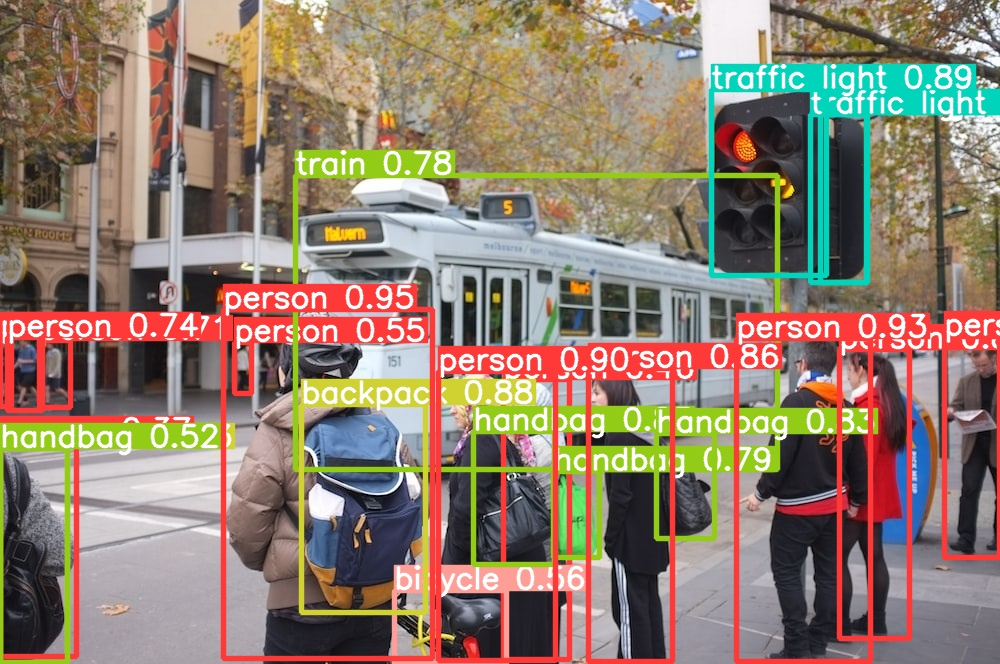

In [6]:
from IPython.display import Image
Image(filename='runs/detect/predict/image1.jpg')

In [ ]:
#Inference on Video using Pretrained Model

In [7]:
!gdown "https://drive.google.com/uc?id=1hl_NNFciFwImmqplL3RkozpiIa8I38cd&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1hl_NNFciFwImmqplL3RkozpiIa8I38cd&confirm=t
To: /content/yolov10/demo.mp4
100% 11.5M/11.5M [00:00<00:00, 19.8MB/s]


In [8]:
!yolo task=detect mode=predict save=True model=weights/yolov10x.pt source = "demo.mp4"

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

In [9]:
!rm '/content/result_compressed.mp4'

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [14]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/yolov10/runs/detect/predict2/demo.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

# Compress the video using ffmpeg
os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Read the compressed video file
mp4 = open(compressed_path, 'rb').read()

# Encode the video in base64
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

# Display the video
HTML(f"""
<video width="640" height="480" controls>
      <source src="{data_url}" type="video/mp4">
</video>
""")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Downlaod the yolov10x model

In [17]:
from google.colab import files

# Path to the file you want to download
file_path = '/content/yolov10/weights/yolov10x.pt'

# Download the file
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>